# Kelompok 5:
- Afina Rahmani 1901377
- Azzahra Fahriza 2102296
- Muhammad Azka Atqiya 2100812
- Nadhief Athallah Isya 2106413
- Raisyad Jullfikar 2106238

#### Untuk Memanggil Library

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pickle
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.decomposition import PCA
import joblib
import pickle

#### Untuk Membaca File CSV dan Menjadikan File CSV Menjadi Data Frame

In [2]:
df = pd.read_csv("D:/KULIAH/Semester 3/Data Mining/Tugas Sedang/Latihan2/Data_Datmin/Csv/orders_train.csv")

#### Untuk Melihat Informasi dari Data Frame

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481092 entries, 0 to 481091
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   orderItemID     481092 non-null  int64  
 1   orderDate       481092 non-null  object 
 2   deliveryDate    481092 non-null  object 
 3   itemID          481092 non-null  int64  
 4   size            481092 non-null  object 
 5   color           481092 non-null  object 
 6   manufacturerID  481092 non-null  int64  
 7   price           481092 non-null  float64
 8   customerID      481092 non-null  int64  
 9   salutation      481092 non-null  object 
 10  dateOfBirth     481092 non-null  object 
 11  state           481092 non-null  object 
 12  creationDate    481092 non-null  object 
 13  returnShipment  481092 non-null  int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 51.4+ MB


#### Untuk Mengganti '?' Pada Kolom dateOfBirth Menjadi None

In [4]:
df.dateOfBirth=df.dateOfBirth.str.replace('?',"None", regex=True)

#### Untuk Melihat Data dari Atas Sebanyak 10 Data

In [5]:
df.head(10)

,orderItemID,orderDate,deliveryDate,itemID,size,color,manufacturerID,price,customerID,salutation,dateOfBirth,state,creationDate,returnShipment
0,1,4/1/2012,4/3/2012,186,m,denim,25,69.90,794,Mrs,1/6/1965,Baden-Wuerttemberg,4/25/2011,0
1,2,4/1/2012,4/3/2012,71,9+,ocher,21,69.95,794,Mrs,1/6/1965,Baden-Wuerttemberg,4/25/2011,1
2,3,4/1/2012,4/3/2012,71,9+,curry,21,69.95,794,Mrs,1/6/1965,Baden-Wuerttemberg,4/25/2011,1
3,4,4/2/2012,?,22,m,green,14,39.90,808,Mrs,11/9/1959,Saxony,1/4/2012,0
4,5,4/2/2012,12/31/1990,151,39,black,53,29.90,825,Mrs,7/11/1964,Rhineland-Palatinate,2/16/2011,0
5,6,4/2/2012,12/31/1990,598,xxl,brown,87,89.90,825,Mrs,7/11/1964,Rhineland-Palatinate,2/16/2011,0
6,7,4/2/2012,12/31/1990,15,39,black,1,129.90,825,Mrs,7/11/1964,Rhineland-Palatinate,2/16/2011,0
7,8,4/2/2012,4/3/2012,32,xxl,brown,3,21.90,850,Mrs,4/8/1948,North Rhine-Westphalia,2/16/2011,1
8,9,4/2/2012,4/3/2012,32,xxl,red,3,21.90,850,Mrs,4/8/1948,North Rhine-Westphalia,2/16/2011,1
9,10,4/2/2012,4/3/2012,57,xxl,green,3,39.90,850,Mrs,4/8/1948,North Rhine-Westphalia,2/16/2011,1


#### Untuk Melihat Data Null

In [6]:
df.isna().sum()

orderItemID       0
orderDate         0
deliveryDate      0
itemID            0
size              0
color             0
manufacturerID    0
price             0
customerID        0
salutation        0
dateOfBirth       0
state             0
creationDate      0
returnShipment    0
dtype: int64

#### Untuk Menjadikan Nilai Nol Menjadi Null Kemudian Nilai Null Tersebut Diisi Oleh Nilai Median Dari Data Harga

In [7]:
df.loc[(df.price == 0), "price"]=np.nan
df["price"] = df['price'].fillna(df['price'].median(),inplace=False)

#### Untuk Mengubah String not reported Menjadi None

In [8]:
df.loc[(df.salutation == 'not reported'), "salutation"]= "None"

#### Praproses pada Atribut Size

In [9]:
# mengubah huruf dan angka anomali pada size menjadi angka sesuai dengan ketentuan ukuran Europe
df['size'] = df['size'].replace("xs", "30")
df['size'] = df['size'].replace("XS", "30")
df['size'] = df['size'].replace("s", "34")
df['size'] = df['size'].replace("S", "34")
df['size'] = df['size'].replace("m", "38")
df['size'] = df['size'].replace("M", "38")
df['size'] = df['size'].replace("l", "42")
df['size'] = df['size'].replace("L", "42")
df['size'] = df['size'].replace("xl", "46")
df['size'] = df['size'].replace("XL", "46")
df['size'] = df['size'].replace("xxl", "48")
df['size'] = df['size'].replace("XXL", "48")
df['size'] = df['size'].replace("xxxl", "52")
df['size'] = df['size'].replace("XXXL", "52")
df['size'] = df['size'].replace("unsized", np.nan)
df['size'] = df['size'].replace("2+", "3")
df['size'] = df['size'].replace("3+", "4")
df['size'] = df['size'].replace("4+", "5")
df['size'] = df['size'].replace("5+", "6")
df['size'] = df['size'].replace("6+", "7")
df['size'] = df['size'].replace("7+", "8")
df['size'] = df['size'].replace("8+", "9")
df['size'] = df['size'].replace("9+", "10")
df['size'] = df['size'].replace("10+", "11")
df['size'] = df['size'].replace("11+", "12")
df['size'] = df['size'].replace("12+", "13")
df['size'] = df['size'].replace("13+", "14")
df['size'] = df['size'].replace("37+", "38")
df['size'] = df['size'].replace("38+", "39")
df['size'] = df['size'].replace("39+", "40")
df['size'] = df['size'].replace("40+", "41")
df['size'] = df['size'].replace("41+", "42")
df['size'] = df['size'].replace("43+", "44")
df['size'] = df['size'].replace("44+", "45")
df['size'] = df['size'].replace("45+", "46")
df['size'] = df['size'].replace("46+", "47")

# menjadikan format size menjadi integer 
df['size'] = pd.to_numeric(df['size'], errors = 'coerce').convert_dtypes()

# mengubah angka anomali menjadi angka size ukuran global (europe)
df['size'] = df['size'].mask(df['size']<=2, 30) #XS
df['size'] = df['size'].mask(df['size']<=6, 34) #S
df['size'] = df['size'].mask(df['size']<=10, 38)#M 
df['size'] = df['size'].mask(df['size']<=14, 42)#L
df['size'] = df['size'].mask(df['size']<=18, 46)#XL
df['size'] = df['size'].mask(df['size']<=22, 48)#XXL
df['size'] = df['size'].mask(df['size']<=26, 52)#XXXL

# mengubah nilai range data menjadi angka size ukuran global Europe
df.loc[df['size'].between(27, 29), 'size'] = 30
df.loc[df['size'].between(31, 33), 'size'] = 34
df.loc[df['size'].between(35, 37), 'size'] = 38
df.loc[df['size'].between(39, 41), 'size'] = 42
df.loc[df['size'].between(43, 45), 'size'] = 46
df['size'] = df['size'].replace(47, 48)
df.loc[df['size'].between(49, 51), 'size'] = 52
df.loc[df['size'].between(53, 55), 'size'] = 56
df.loc[df['size'].between(57, 59), 'size'] = 60

# mengubah nilai range data anomali atau ekstrim menggunakan data mean, median dan value global
df.loc[df['size'].between(61, 1000), 'size'] = int(df['size'].mean())
df.loc[df['size'].between(1001, 5000), 'size'] = df['size'].median()
df.loc[df['size'].between(43, 45), 'size'] = 46

# untuk mengisi nilai null pada size dengan nilai median
df["size"] = df['size'].fillna(df['size'].median(),inplace=False)

# mengubah tipe data size menjadi string
df['size'] = df['size'].astype(str)

# mengubah value global menjadi ukuran baju (str)
df['size'] = df['size'].replace("30", "XS")
df['size'] = df['size'].replace("34", "S")
df['size'] = df['size'].replace("38", "M")
df['size'] = df['size'].replace("42", "L")
df['size'] = df['size'].replace("46", "XL")
df['size'] = df['size'].replace("48", "XXL")
df['size'] = df['size'].replace("52", "XXXL")
df['size'] = df['size'].replace("56", "XXXXL")
df['size'] = df['size'].replace("60", "XXXXL")


#### Mengubah Tipe Data

In [10]:
df['size'] = df['size'].astype('category')
df['color'] = df['color'].astype('category')
df['salutation'] = df['salutation'].astype('category')
# mengubah tipe data creationDate menjadi tipe data Datetime
df['creationDate'] = pd.to_datetime(df['creationDate'], errors='coerce')
df['creationDate'] = pd.to_datetime(df['creationDate'], unit='s')

#### Proses Pengubahan Format Date Menjadi Format Usia (int)

In [11]:
now = pd.Timestamp('now')
df['dateOfBirth'] = pd.to_datetime(df['dateOfBirth'], errors='coerce')
df['dateOfBirth'] = (now - df['dateOfBirth']).astype('<m8[Y]')
df['dateOfBirth'] = pd.to_numeric(df['dateOfBirth'], errors = 'coerce').convert_dtypes()

#### Mengubah Nama Kolom dateOfBirth Menjadi Age

In [12]:
df[df['size'] == 'XXXXXL']

,orderItemID,orderDate,deliveryDate,itemID,size,color,manufacturerID,price,customerID,salutation,dateOfBirth,state,creationDate,returnShipment


In [13]:
df.rename(columns={'dateOfBirth':'Age'},inplace=True)

#### Mengubah Tipe Data Menjadi Format Date

In [14]:
df['deliveryDate'] = pd.to_datetime(df['deliveryDate'], errors='coerce')
df['orderDate'] = pd.to_datetime(df['orderDate'], errors='coerce')
df['deliveryDate'] = pd.to_datetime(df['deliveryDate'], unit='s')
df['orderDate'] = pd.to_datetime(df['orderDate'], unit='s')

#### Menghapus Baris yang Kosong atau Null

In [15]:
df = df.dropna()

#### Mengeliminasi Data Delivery yang Tahunnya Kurang Dari Data Order

In [16]:
df = df[df['deliveryDate'] > df['orderDate']].dropna()

# Grafik nilai ekstrim Age

<AxesSubplot:xlabel='Age'>

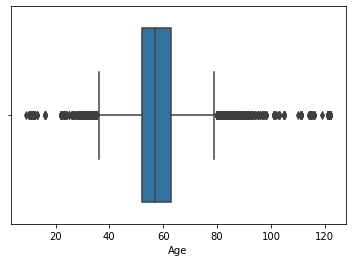

In [17]:
sns.boxplot(x="Age",data=df)

## Kesimpulan 
Untuk mencari nilai ekstrim pada atribut Age dan pada atribut ini terdapat nilai ekstrim yaitu 120 keatas

# Grafik Jumlah Salutation

<AxesSubplot:xlabel='salutation', ylabel='count'>

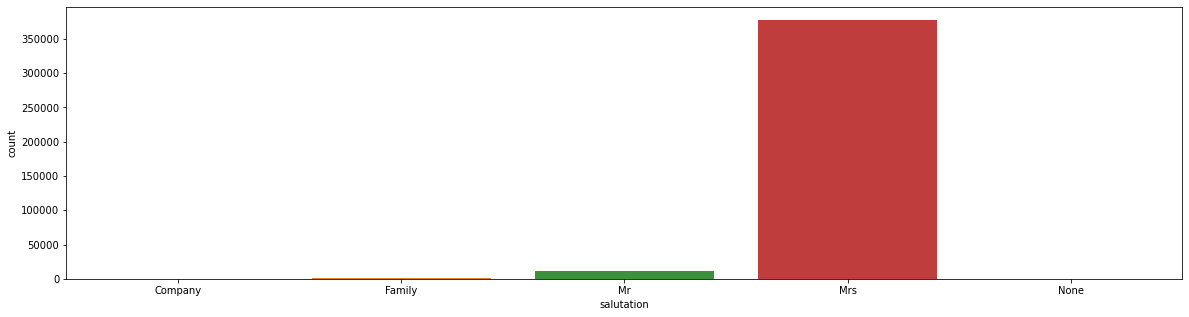

In [18]:
fig, ax = plt.subplots(figsize=(20, 5)) #atur ukuran chart
sns.countplot(ax=ax, x="salutation", data=df)

## Kesimpulan
Untuk melihat jumlah salutation disetiap kategorinya

# Grafik Jumlah Ukuran

<AxesSubplot:xlabel='size', ylabel='count'>

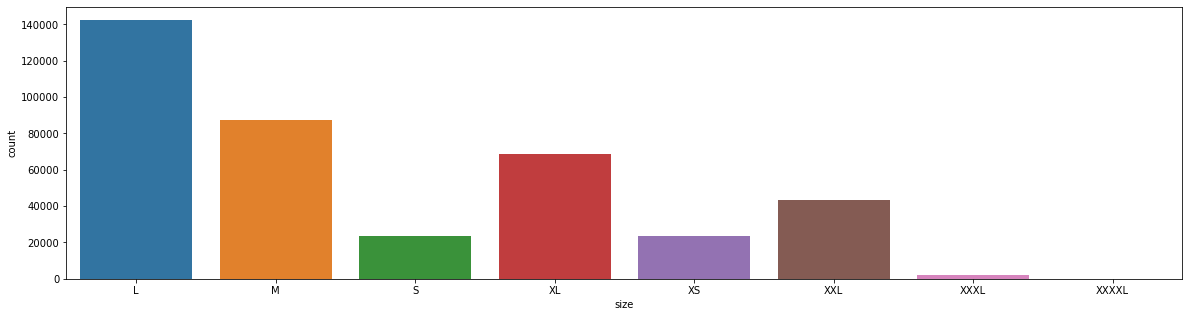

In [19]:
fig, ax = plt.subplots(figsize=(20, 5)) #atur ukuran chart
sns.countplot(ax=ax, x="size", data=df)

## Kesimpulan
Untuk melihat jumlah ukuran baju disetiap ukurannya

# Grafik Hubungan Banyaknya Minat Ukuran Baju Terhadap Salutation

<AxesSubplot:xlabel='size', ylabel='count'>

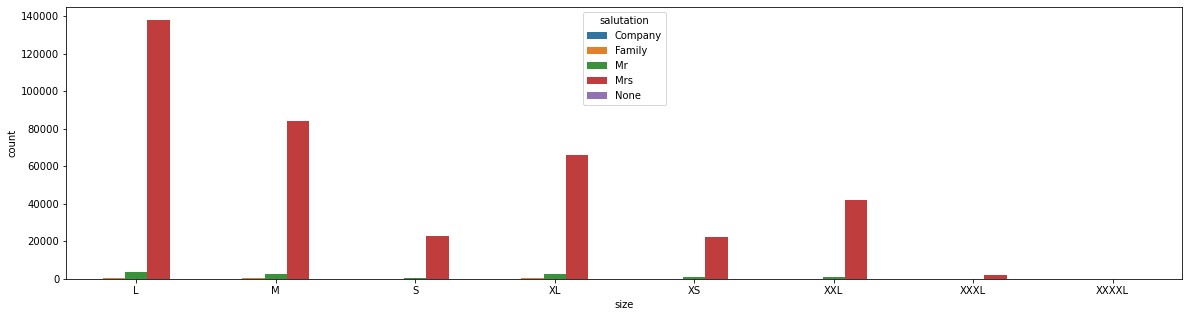

In [20]:
fig, ax = plt.subplots(figsize=(20, 5)) #atur ukuran chart
sns.countplot(ax=ax, x="size",hue='salutation', data=df)

## Kesimpulan
Untuk melihat banyaknya minat ukuran baju terhadap customer atau nama panggilan tersebut yang mana nama panggilan mrs
mendominasi pada ukuran baju selain xxxl dan xxxxxl

# Grafik Outlier Harga

<AxesSubplot:xlabel='price'>

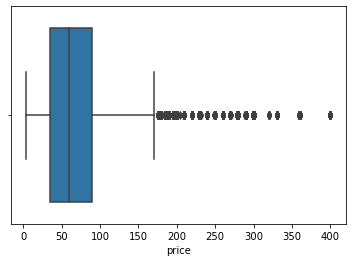

In [21]:
sns.boxplot(x="price",data=df)

## Kesimpulan
untuk mencari nilai ekstrim dari sebuah atribut yaitu atribut harga dan menurut kelompok kami terdapat nilai ekstrim

# Grafik Ukuran

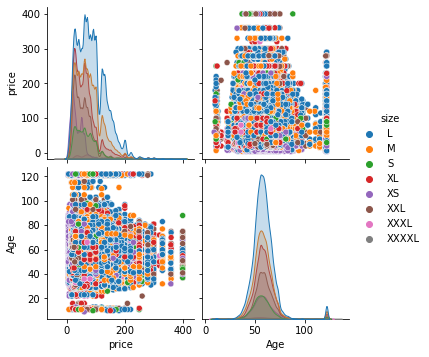

In [22]:
sns.pairplot(data=df[['price','Age','size']],hue="size")

## Kesimpulan 
ukuran L merupakan ukuran yang paling mendominasi diberbagai usia dengan harga yang beragam

# Grafik Salutation disetiap Kota

<AxesSubplot:xlabel='count', ylabel='state'>

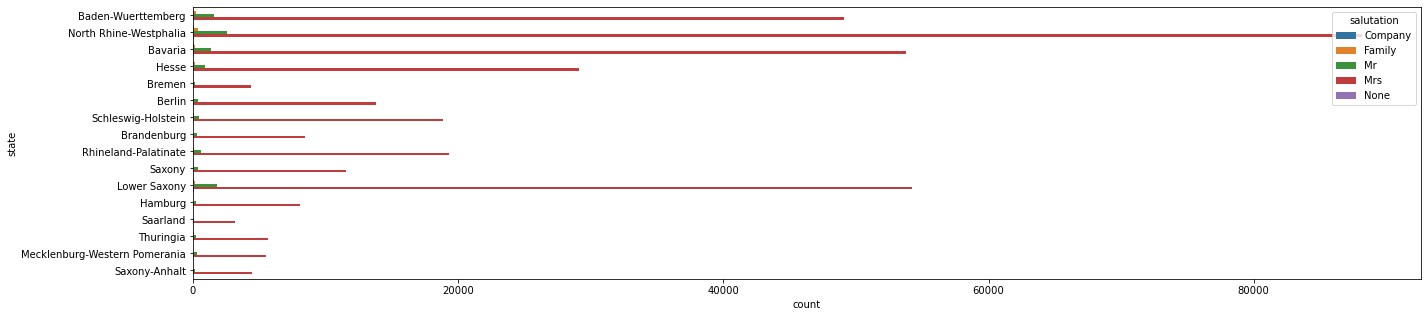

In [23]:
fig, ax = plt.subplots(figsize=(22, 5)) #atur ukuran chart
sns.countplot(ax=ax, y="state", hue='salutation', data=df)

## Kesimpulan 
Bahwa salutation yang mendominasi pada setiap kotanya kembali diduduki oleh mrs 
yang mana terlihat persebaran jumlah datanya sangat tinggi

# Grafik Peminat Ukuran Baju Terhadap Salutation dan Negara

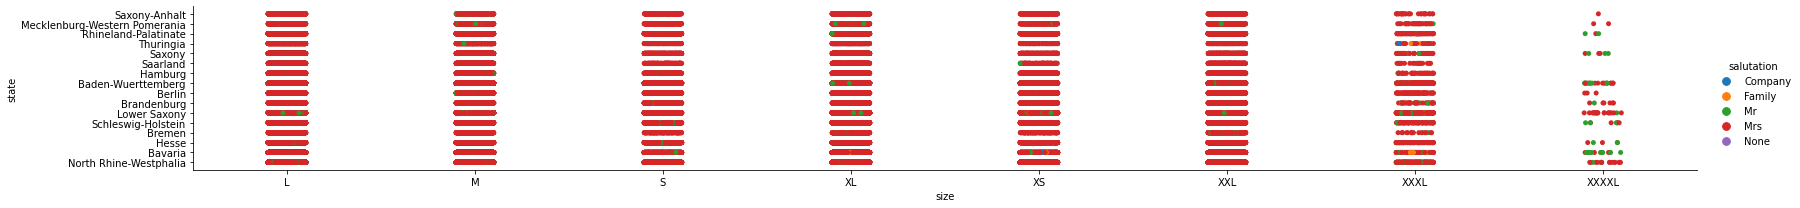

In [24]:
sns.catplot(x="size", y="state", hue="salutation", data=df, height=3,aspect=8)

## Kesimpulan 
Bahwa salutation mrs mendominasi di semua kota namun peminat ukuran baju untuk yang mendominasi ini tidak mendominasi 
kembali pada ukuran baju yang ukurannya xxxxl ke atas

In [25]:
df1=df[df.Age < 100 ]

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386381 entries, 0 to 481087
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   orderItemID     386381 non-null  int64         
 1   orderDate       386381 non-null  datetime64[ns]
 2   deliveryDate    386381 non-null  datetime64[ns]
 3   itemID          386381 non-null  int64         
 4   size            386381 non-null  category      
 5   color           386381 non-null  category      
 6   manufacturerID  386381 non-null  int64         
 7   price           386381 non-null  float64       
 8   customerID      386381 non-null  int64         
 9   salutation      386381 non-null  category      
 10  Age             386381 non-null  Int64         
 11  state           386381 non-null  object        
 12  creationDate    386381 non-null  datetime64[ns]
 13  returnShipment  386381 non-null  int64         
dtypes: Int64(1), category(3), datetime64

## PEMBUATAN MODEL

In [27]:
#Penghapusan beberapa column yang tidak diperlukan dalam pembuatan model
df1_train = df1.drop(['creationDate', 'deliveryDate', 'orderDate','orderItemID','color'],axis=1)

In [28]:
df1_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386381 entries, 0 to 481087
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   itemID          386381 non-null  int64   
 1   size            386381 non-null  category
 2   manufacturerID  386381 non-null  int64   
 3   price           386381 non-null  float64 
 4   customerID      386381 non-null  int64   
 5   salutation      386381 non-null  category
 6   Age             386381 non-null  Int64   
 7   state           386381 non-null  object  
 8   returnShipment  386381 non-null  int64   
dtypes: Int64(1), category(2), float64(1), int64(4), object(1)
memory usage: 24.7+ MB


In [29]:
#Pembuatan Once Hot Encoding
df1_train = pd.get_dummies(data=df1_train, columns=['state','size','salutation'])

In [30]:
# Penentuan target
le = preprocessing.LabelEncoder()
le.fit(df1_train.returnShipment)
Y = le.transform(df1_train.returnShipment)

In [31]:
df1_train.returnShipment.value_counts()

1    204092
0    182289
Name: returnShipment, dtype: int64

In [32]:
# Karena sudah disimpan ke variabel le, maka returnShipment bisa dihapus
X = df1_train.drop("returnShipment",axis=1)

In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386381 entries, 0 to 481087
Data columns (total 34 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   itemID                               386381 non-null  int64  
 1   manufacturerID                       386381 non-null  int64  
 2   price                                386381 non-null  float64
 3   customerID                           386381 non-null  int64  
 4   Age                                  386381 non-null  Int64  
 5   state_Baden-Wuerttemberg             386381 non-null  uint8  
 6   state_Bavaria                        386381 non-null  uint8  
 7   state_Berlin                         386381 non-null  uint8  
 8   state_Brandenburg                    386381 non-null  uint8  
 9   state_Bremen                         386381 non-null  uint8  
 10  state_Hamburg                        386381 non-null  uint8  
 11  state_Hesse  

In [34]:
# Split dataset
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=123)

In [35]:
# Pembuatan pickle
with open('D:\\KULIAH\\Semester 3\\Data Mining\\Tugas Sedang\\Latihan2\\data.pickle', 'wb') as fp:
    pickle.dump(X_train.columns, fp)


In [36]:
# Mengubah nilai menjadi 0 sampai 1
mm_scaler = preprocessing.MinMaxScaler()
X_train_minmax = mm_scaler.fit_transform(X_train)
X_test_minmax = mm_scaler.transform(X_test)

In [37]:
# Modeling
clf = RandomForestClassifier(n_estimators=50, random_state=123)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print("Akurasi {}".format(acc))
print(classification_report(Y_test, Y_pred))

Akurasi 0.6245713472313884
              precision    recall  f1-score   support

           0       0.61      0.55      0.58     36326
           1       0.63      0.69      0.66     40951

    accuracy                           0.62     77277
   macro avg       0.62      0.62      0.62     77277
weighted avg       0.62      0.62      0.62     77277



In [38]:
# Mengeksport modeling yang akan dipakai
joblib.dump(clf, "D:\\KULIAH\\Semester 3\\Data Mining\\Tugas Sedang\\Latihan2\\classification.joblib")

['D:\\KULIAH\\Semester 3\\Data Mining\\Tugas Sedang\\Latihan2\\classification.joblib']